<a href="https://colab.research.google.com/github/FatmaAMR/Linear-Regression-Implementation/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📈 Linear Regression from Scratch & with Scikit-Learn**

###**🎯 Goal**

The main goal of this notebook is to manually implement a Linear Regression model from scratch, using only mathematical equations. This is done to understand how linear models work internally — without relying on machine learning libraries like Scikit-learn for the modeling part.



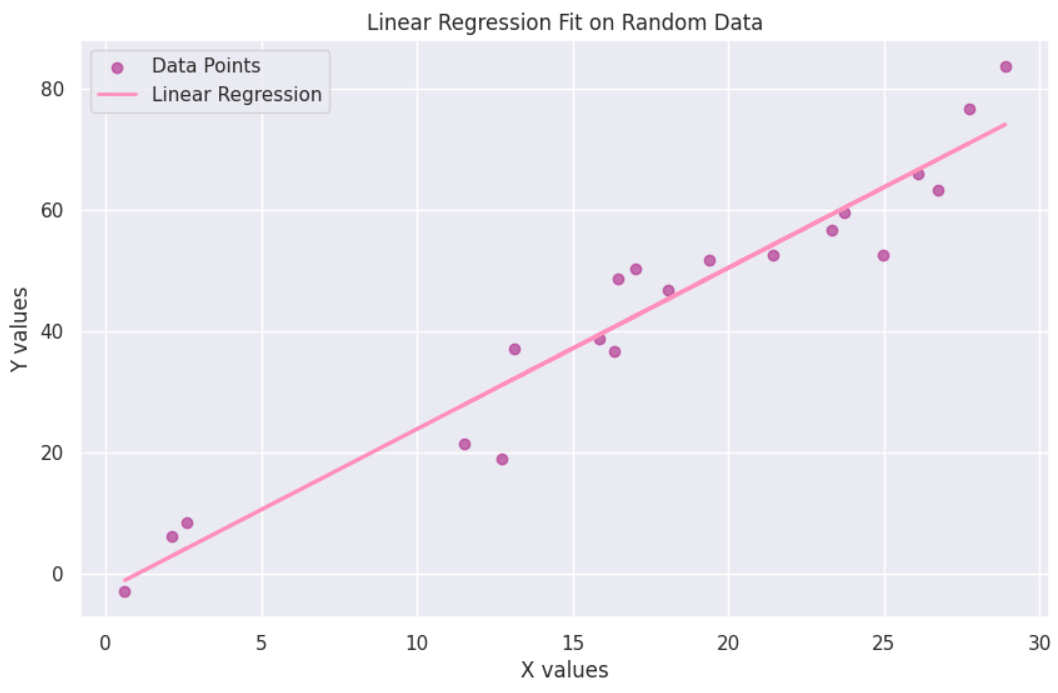```


## **📌Model class initiation**


1.  **setting relative parameter**

 * ➡️ `b` (*the bias of the model*)
 * ➡️ `w` (*the weight of the feature*)
     * according to
      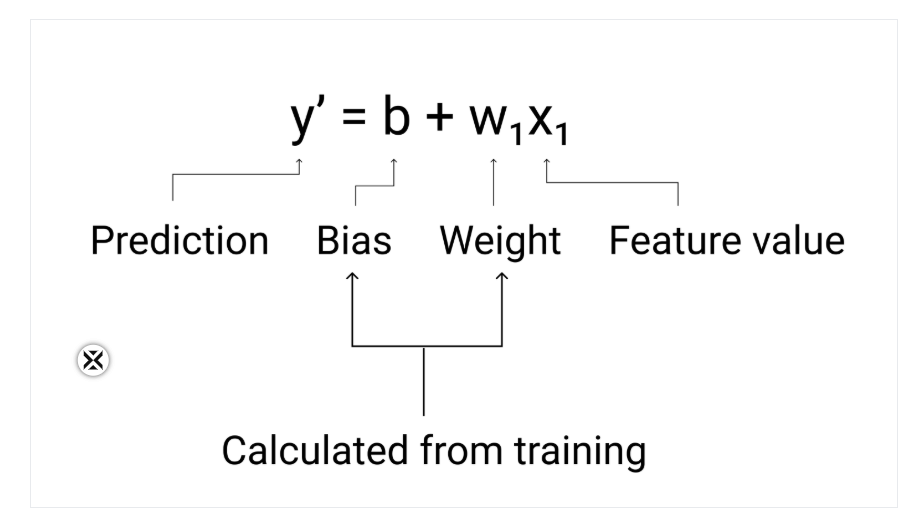


2.   **defining the needed methods**
  * `fit` method to intiat `b` and `w` valuese.
      * using
      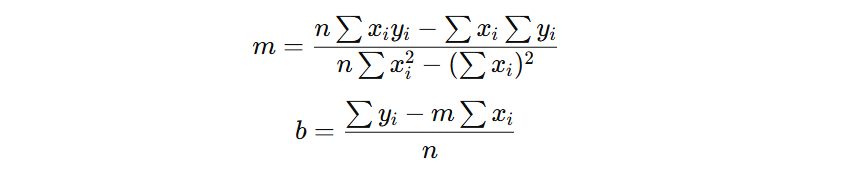
  * `predict` method to return predectable values.
  * `print`method to present the model equation.


In [69]:
class Manual_LinearRegression:
  def __init__(self):
    self.w = None
    self.b = None


  def fit(self,x,y):
    n = len(x)

    #w equation
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x*y)
    x_seq_sum = np.sum(x**2)
    numerator_w = (n*xy_sum)-(x_sum*y_sum)
    denominator_w = (n*x_seq_sum)-(x_sum**2)
    self.w = numerator_w/denominator_w

    #b equation
    y_sum = np.sum(y)
    self.b = (y_sum - (self.w*x_sum))/n

    print("Linear regression model builded!")



  def predict(self, x):
        if self.w is None or self.b is None:
            raise ValueError("Model is not trained yet. Call `fit` first.")
        x = np.array(x)
        return self.w * x + self.b

  def print_model(self):
    print(f"Linear Regression Model: y = {self.w:.2f}x + {self.b:.2f}")

  def predict_and_show(self, x, xs, ys):
        if self.w is None or self.b is None:
            raise ValueError("Model not trained. Call `fit()` first.")

        y = self.predict(x)

        y_pred_line = self.predict(xs)

        sns.set(style="darkgrid")
        plt.figure(figsize=(10, 6))

        plt.scatter(xs, ys, label='Data Points', alpha=0.7)


        plt.plot(xs, y_pred_line, linewidth=2, label='Regression Line')

        plt.scatter(x, y, label='Prediction', s=100, marker='X')

        plt.xlabel('X values')
        plt.ylabel('Y values')
        plt.title('Linear Regression Prediction Visualization')
        plt.legend()
        plt.show()

        return y


## **🔦Model Test**

In [70]:
import numpy as np

# Generate random data
np.random.seed(0)
n = 30
xs = np.random.rand(n) * 30   # Random numbers between 0 and 30
ys = 2.5 * xs + np.random.randn(n) * 5  # y = 2.5x + noise

In [71]:
model = Manual_LinearRegression()
model.fit(xs,ys)

Linear regression model builded!


In [72]:
model.print_model()

Linear Regression Model: y = 2.46x + 0.22


In [73]:
model.predict(5)

np.float64(12.517548992496078)

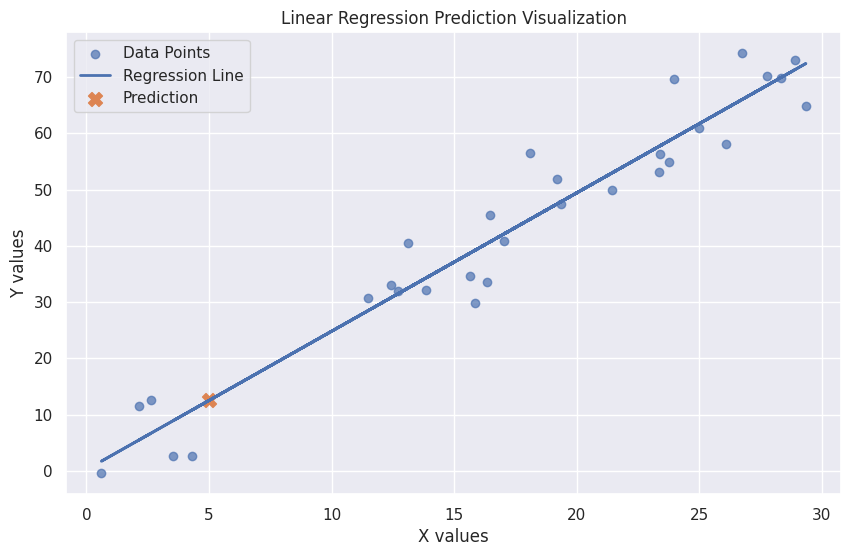

y = 12.517548992496078


In [74]:
y_pred = model.predict_and_show(5,xs,ys);
print(f"y = {y_pred}")

## **Manual built model  🆚 Sklearn Model**

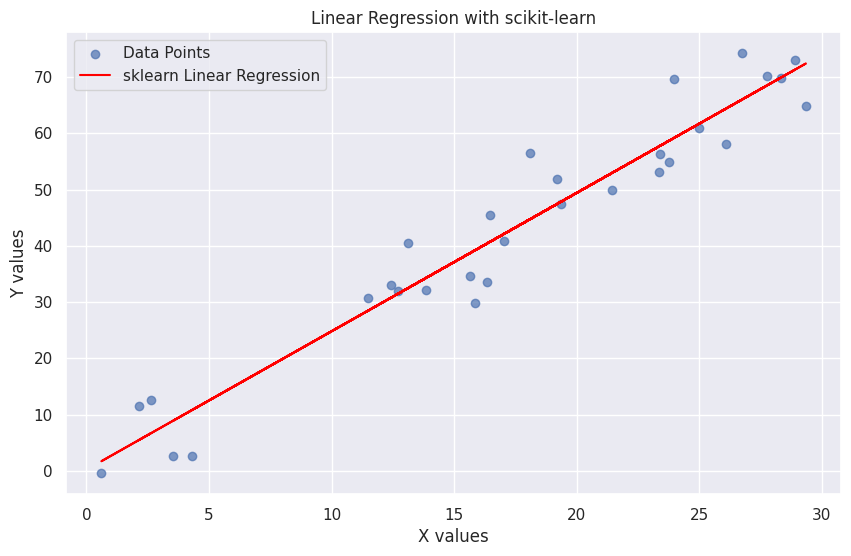

In [77]:
from sklearn.linear_model import LinearRegression
# Reshape x for sklearn
x_reshaped = xs.reshape(-1, 1)

# Fit linear regression
sk_model = LinearRegression()
sk_model.fit(x_reshaped, ys)
y_pred = model.predict(x_reshaped)

## **[📝Notes](https://)**

###the main cell plot gneratration code

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
# Generate random data
np.random.seed(0)
n = 20
x = np.random.rand(n) * 30   # Random numbers between 0 and 30
y = 2.5 * x + np.random.randn(n) * 5  # y = 2.5x + noise

In [7]:
# Reshape x for sklearn
x_reshaped = x.reshape(-1, 1)

# Fit linear regression
model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

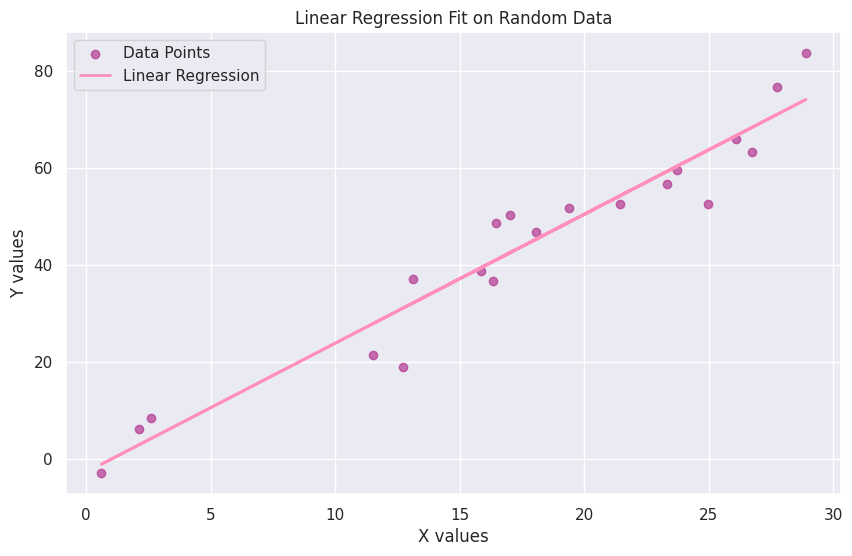

In [19]:
# Plot using seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Scatter plot of data
plt.scatter(x, y, c='#B33791', label='Data Points', alpha=0.7)

# Regression line
plt.plot(x, y_pred, color='#FF90BB', linewidth=2, label='Linear Regression')

# Labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Fit on Random Data')
plt.legend()
plt.show()
